In [1]:

# Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks')
from scipy import stats
import matplotlib.pylab as pl

In [3]:
# Published returns in Fama-French 
Return = pd.Series([1.64,1.16,1.29,1.24,1.25,1.29,1.17,1.07,1.1,0.95,0.88,0.9])
Beta = pd.Series([1.44,1.44,1.39,1.34,1.33,1.24,1.22,1.16,1.08,1.02,0.95,0.9])
ln_ME = pd.Series([1.98,3.18,3.63,4.1,4.5,4.89,5.3,5.73,6.24,6.82,7.39,8.44])

size_ports = pd.DataFrame({'Return' : Return, 'Beta' : Beta, 'ln_ME' : ln_ME})
size_ports.index = np.array(['1A','1B','2','3','4','5','6','7','8','9','10A','10B'])

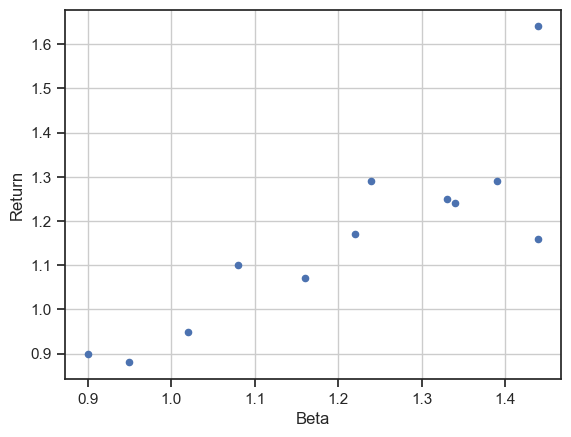

In [13]:
size_ports[['Beta','Return']].plot(kind='scatter',x='Beta',y='Return', grid=True);

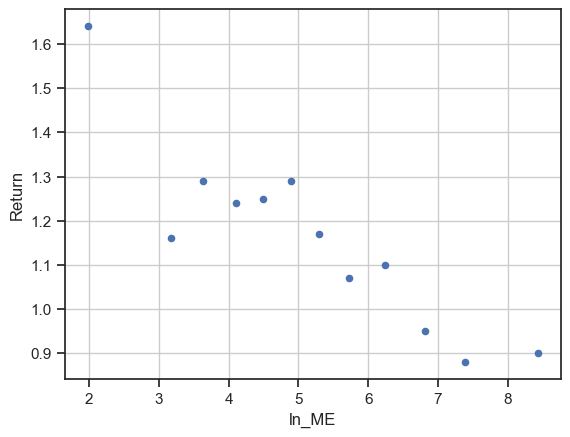

In [17]:
size_ports[['ln_ME','Return']].plot(kind='scatter',x='ln_ME',y='Return', grid=True);

In [18]:
size_ports[['ln_ME','Beta','Return']].corr()

,ln_ME,Beta,Return
ln_ME,1.000000,-0.978836,-0.899929
Beta,-0.978836,1.000000,0.842557
Return,-0.899929,0.842557,1.000000


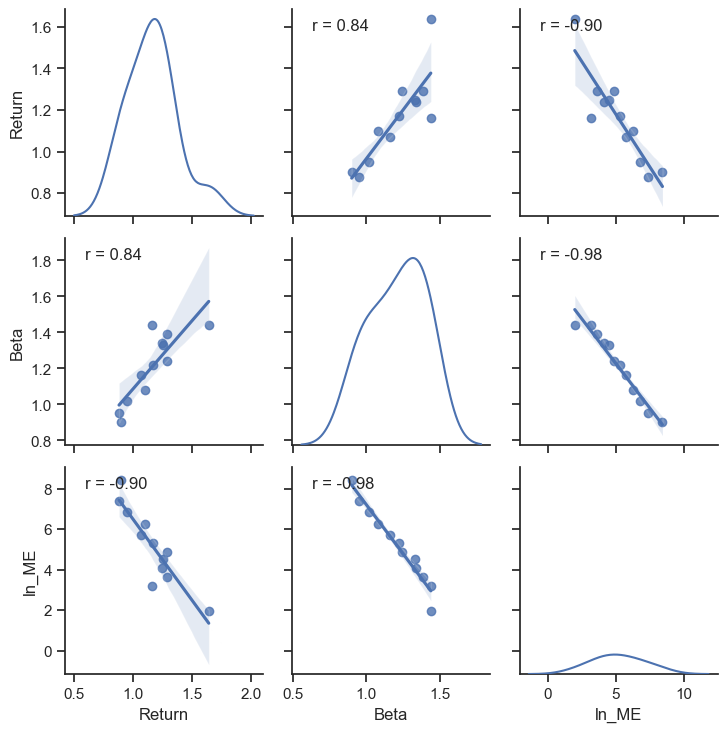

In [19]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = pl.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

#with sns.axes_style('white'):
if True:
    g = sns.PairGrid(size_ports)
    g.map_diag(sns.kdeplot)
    g.map_offdiag(sns.regplot);
    g.map_offdiag(corrfunc)

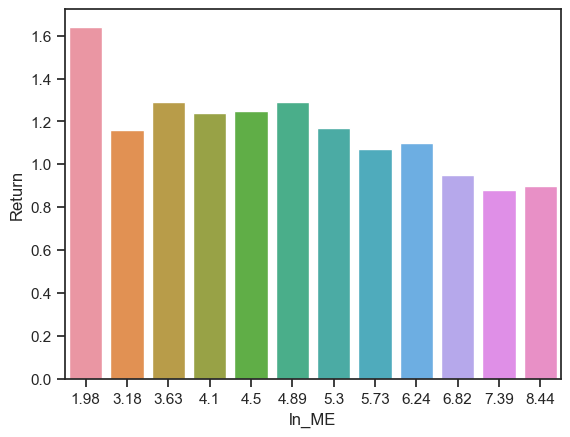

In [22]:
sns.barplot(x='ln_ME', y='Return', data = size_ports);

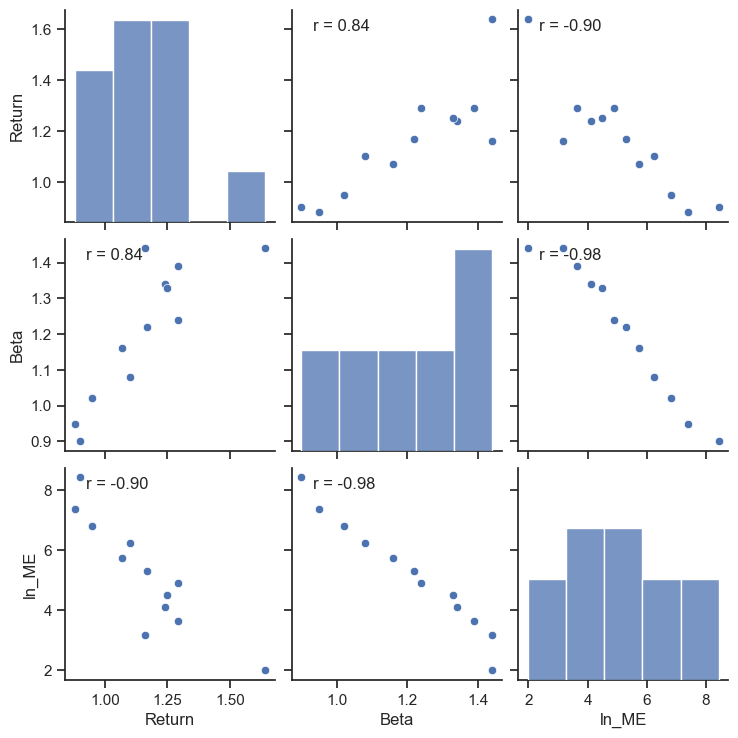

In [6]:
g = sns.pairplot(size_ports);

g.map_offdiag(corrfunc);
